In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/11_Nov.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,20.000000,81.000000,1,4,1,1943.0,1963.0,2051.0,1852.0,1803.0,1981.0,1951.416667,1867.0
1,19.916667,81.000000,1,4,1,1889.0,1975.0,2036.0,1828.0,1781.0,1976.0,1933.750000,1824.0
2,19.833333,81.000000,1,4,1,1901.0,1990.0,2012.0,1764.0,1755.0,1935.0,1916.750000,1808.0
3,19.750000,81.000000,1,4,1,1887.0,1977.0,1977.0,1802.0,1760.0,1941.0,1902.416667,1805.0
4,19.666667,81.000000,2,4,1,1867.0,1943.0,1963.0,1788.0,1740.0,1913.0,1888.916667,1801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,13.432452,78.354324,23,7,0,1672.0,1762.0,1868.0,1657.0,1676.0,1644.0,1709.083333,1600.0
8636,13.432452,78.354324,24,7,0,1634.0,1746.0,1826.0,1630.0,1645.0,1619.0,1687.833333,1571.0
8637,13.432452,78.354324,24,7,0,1643.0,1722.0,1801.0,1613.0,1620.0,1603.0,1666.500000,1545.0
8638,13.100000,78.354324,24,7,0,1608.0,1699.0,1796.0,1598.0,1594.0,1583.0,1645.916667,1549.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.338113,0.300581,0.738842,-1.660674,-0.010075,0.654556,0.627494,0.703938,1.039060,0.269868,0.059076,0.687580,0.690287
1,0.174436,0.278981,0.738842,-1.660674,-0.010075,0.654556,0.421946,0.749615,0.981972,0.179003,-0.023053,0.669084,0.619921
2,0.113533,0.257381,0.738842,-1.660674,-0.010075,0.654556,0.467623,0.806711,0.890631,-0.063306,-0.120116,0.517414,0.552210
3,0.102114,0.235781,0.738842,-1.660674,-0.010075,0.654556,0.414333,0.757227,0.757425,0.080565,-0.101450,0.539610,0.495120
4,0.086888,0.214181,0.738842,-1.516238,-0.010075,0.654556,0.338204,0.627810,0.704143,0.027560,-0.176114,0.436031,0.441349


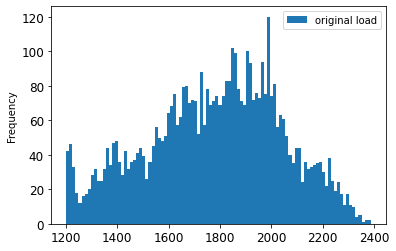

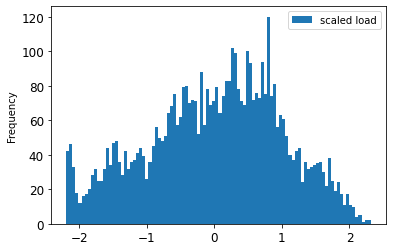

In [8]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

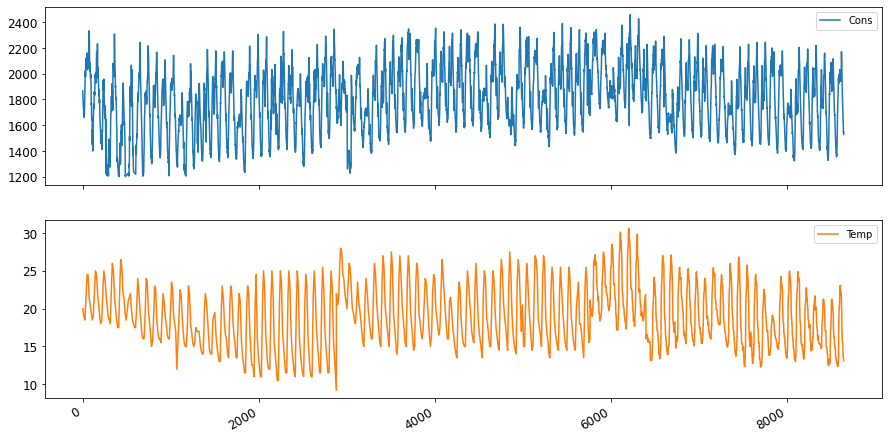

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,0.338113,0.300581,0.738842,-1.660674,-0.010075,0.654556,0.627494,0.703938,1.039060,0.269868,0.059076,0.687580,0.690287,0.174436
1,0.174436,0.278981,0.738842,-1.660674,-0.010075,0.654556,0.421946,0.749615,0.981972,0.179003,-0.023053,0.669084,0.619921,0.113533
2,0.113533,0.257381,0.738842,-1.660674,-0.010075,0.654556,0.467623,0.806711,0.890631,-0.063306,-0.120116,0.517414,0.552210,0.102114
3,0.102114,0.235781,0.738842,-1.660674,-0.010075,0.654556,0.414333,0.757227,0.757425,0.080565,-0.101450,0.539610,0.495120,0.086888
4,0.086888,0.214181,0.738842,-1.516238,-0.010075,0.654556,0.338204,0.627810,0.704143,0.027560,-0.176114,0.436031,0.441349,-0.031112
5,-0.031112,0.192581,0.738842,-1.516238,-0.010075,0.654556,0.174527,0.422264,0.749813,-0.108739,-0.276909,0.350948,0.373306,-0.076789
6,-0.076789,0.170982,0.738842,-1.516238,-0.010075,0.654556,0.113624,0.467941,0.806902,-0.104953,-0.261977,0.299158,0.296301,-0.130079
7,-0.130079,0.149382,0.738842,-1.516238,-0.010075,0.654556,0.102205,0.414651,0.757425,-0.112525,-0.336640,0.221474,0.218965,-0.190982
8,-0.190982,0.127782,0.738842,-1.371801,-0.010075,0.654556,0.086979,0.338523,0.628025,-0.154172,-0.385171,0.188181,0.147603,-0.251885
9,-0.251885,0.106182,0.738842,-1.371801,-0.010075,0.654556,-0.031020,0.174848,0.422507,-0.210963,-0.433703,0.128993,0.088853,-0.255691


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,0.463725,-0.029308,-0.506705,1.372493,-0.513946,0.654556,0.871106,1.286317,1.716508,0.250938,-0.538231,-0.296422,1.054732,0.475145
4792,0.475145,-0.052872,-0.490668,1.516930,-0.513946,0.654556,0.753107,1.164512,1.636584,0.186575,-0.680092,-0.122557,0.953497,0.536048
4793,0.536048,-0.076435,-0.474630,1.516930,-0.513946,0.654556,0.570397,1.016063,1.491961,0.432670,-0.620361,0.236271,0.870186,0.768240
4794,0.768240,-0.099999,-0.458593,1.516930,-0.513946,0.654556,0.600849,0.829549,1.412037,0.587899,-0.224645,0.247369,0.814092,0.726370
4795,0.726370,-0.123563,-0.442556,1.516930,-0.513946,0.654556,0.463817,0.871419,1.286443,0.709053,-0.071585,0.288061,0.765300,0.692112
4796,0.692112,-0.147126,-0.426519,1.661366,-0.513946,0.654556,0.475236,0.753421,1.164655,0.667406,-0.067851,0.169685,0.724143,0.642628
4797,0.642628,-0.170690,-0.410482,1.661366,-0.513946,0.654556,0.536139,0.570714,1.016225,0.542466,-0.120116,0.025414,0.691615,0.547467
4798,0.547467,-0.194253,-0.394445,1.661366,-0.513946,0.654556,0.768332,0.601165,0.829737,0.398595,-0.258243,-0.044872,0.667053,0.387597
4799,0.387597,-0.217817,-0.378408,1.661366,-0.513946,0.654556,0.726462,0.464135,0.871602,0.296371,-0.299308,-0.128105,0.624899,0.242952
4800,0.242952,-0.217817,-0.378408,-1.660674,-0.010075,0.654556,0.692204,0.475554,0.753619,0.137356,-0.586763,-0.211339,0.580422,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4791,0.463725,-0.029308,-0.506705,1.372493,-0.513946,0.654556,0.871106,1.286317,1.716508,0.250938,-0.538231,-0.296422,1.054732,0.475145
4792,0.475145,-0.052872,-0.490668,1.516930,-0.513946,0.654556,0.753107,1.164512,1.636584,0.186575,-0.680092,-0.122557,0.953497,0.536048
4793,0.536048,-0.076435,-0.474630,1.516930,-0.513946,0.654556,0.570397,1.016063,1.491961,0.432670,-0.620361,0.236271,0.870186,0.768240
4794,0.768240,-0.099999,-0.458593,1.516930,-0.513946,0.654556,0.600849,0.829549,1.412037,0.587899,-0.224645,0.247369,0.814092,0.726370
4795,0.726370,-0.123563,-0.442556,1.516930,-0.513946,0.654556,0.463817,0.871419,1.286443,0.709053,-0.071585,0.288061,0.765300,0.692112
4796,0.692112,-0.147126,-0.426519,1.661366,-0.513946,0.654556,0.475236,0.753421,1.164655,0.667406,-0.067851,0.169685,0.724143,0.642628
4797,0.642628,-0.170690,-0.410482,1.661366,-0.513946,0.654556,0.536139,0.570714,1.016225,0.542466,-0.120116,0.025414,0.691615,0.547467
4798,0.547467,-0.194253,-0.394445,1.661366,-0.513946,0.654556,0.768332,0.601165,0.829737,0.398595,-0.258243,-0.044872,0.667053,0.387597
4799,0.387597,-0.217817,-0.378408,1.661366,-0.513946,0.654556,0.726462,0.464135,0.871602,0.296371,-0.299308,-0.128105,0.624899,0.242952
4800,0.242952,-0.217817,-0.378408,-1.660674,-0.010075,0.654556,0.692204,0.475554,0.753619,0.137356,-0.586763,-0.211339,0.580422,0.242952


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,0.174436
1,0.113533
2,0.102114
3,0.086888
4,-0.031112
...,...
4796,0.642628
4797,0.547467
4798,0.387597
4799,0.242952


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.338113,0.300581,0.738842,-1.660674,-0.010075,0.654556,0.627494,0.703938,1.039060,0.269868,0.059076,0.687580,0.690287
1,0.174436,0.278981,0.738842,-1.660674,-0.010075,0.654556,0.421946,0.749615,0.981972,0.179003,-0.023053,0.669084,0.619921
2,0.113533,0.257381,0.738842,-1.660674,-0.010075,0.654556,0.467623,0.806711,0.890631,-0.063306,-0.120116,0.517414,0.552210
3,0.102114,0.235781,0.738842,-1.660674,-0.010075,0.654556,0.414333,0.757227,0.757425,0.080565,-0.101450,0.539610,0.495120
4,0.086888,0.214181,0.738842,-1.516238,-0.010075,0.654556,0.338204,0.627810,0.704143,0.027560,-0.176114,0.436031,0.441349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,0.692112,-0.147126,-0.426519,1.661366,-0.513946,0.654556,0.475236,0.753421,1.164655,0.667406,-0.067851,0.169685,0.724143
4797,0.642628,-0.170690,-0.410482,1.661366,-0.513946,0.654556,0.536139,0.570714,1.016225,0.542466,-0.120116,0.025414,0.691615
4798,0.547467,-0.194253,-0.394445,1.661366,-0.513946,0.654556,0.768332,0.601165,0.829737,0.398595,-0.258243,-0.044872,0.667053
4799,0.387597,-0.217817,-0.378408,1.661366,-0.513946,0.654556,0.726462,0.464135,0.871602,0.296371,-0.299308,-0.128105,0.624899


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4801, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,1810.0,17.833333,62.666667,1.0,4.0,1.0,1947.0,1919.0,1928.0,1761.0,1613.0,1696.0,1914.000000
4802,1793.0,17.666667,63.333333,1.0,4.0,1.0,1922.0,1980.0,1936.0,1768.0,1622.0,1695.0,1902.083333
4803,1787.0,17.500000,64.000000,1.0,4.0,1.0,1880.0,1969.0,1900.0,1749.0,1612.0,1701.0,1892.666667
4804,1774.0,17.333333,64.666667,2.0,4.0,1.0,1842.0,1960.0,1903.0,1731.0,1587.0,1680.0,1881.916667
4805,1751.0,17.166667,65.333333,2.0,4.0,1.0,1810.0,1947.0,1919.0,1722.0,1571.0,1645.0,1867.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,1769.0,15.863636,73.666667,24.0,6.0,1.0,1706.0,1786.0,1866.0,1846.0,1854.0,1846.0,1775.666667
5757,1737.0,15.909091,74.250000,24.0,6.0,1.0,1760.0,1772.0,1869.0,1804.0,1818.0,1824.0,1764.666667
5758,1695.0,15.954545,74.833333,24.0,6.0,1.0,1798.0,1712.0,1839.0,1748.0,1786.0,1782.0,1752.666667
5759,1677.0,16.000000,75.416667,24.0,6.0,1.0,1792.0,1690.0,1815.0,1753.0,1734.0,1748.0,1741.166667


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.278530,-0.421059,0.277919,-1.661325,-0.16853,0.654654,0.322361,0.195107,0.231376,-0.526222,-1.189471,-0.782609,0.185998
4802,-0.353523,-0.464041,0.322711,-1.661325,-0.16853,0.654654,0.212012,0.464386,0.266703,-0.494861,-1.149322,-0.787187,0.130189
4803,-0.379991,-0.507024,0.367503,-1.661325,-0.16853,0.654654,0.026626,0.415827,0.107730,-0.579984,-1.193932,-0.759719,0.086089
4804,-0.437338,-0.550006,0.412296,-1.516862,-0.16853,0.654654,-0.141104,0.376098,0.120978,-0.660628,-1.305455,-0.855856,0.035744
4805,-0.538799,-0.592988,0.457088,-1.516862,-0.16853,0.654654,-0.282351,0.318711,0.191633,-0.700949,-1.376830,-1.016085,-0.029822
4806,-0.627025,-0.635970,0.501880,-1.516862,-0.16853,0.654654,-0.357388,0.208351,0.461004,-0.611346,-1.309916,-0.929104,-0.127000
4807,-0.688784,-0.678952,0.546672,-1.516862,-0.16853,0.654654,-0.383872,0.022946,0.412429,-0.691989,-1.416979,-1.011507,-0.225348
4808,-0.759365,-0.721934,0.591465,-1.372399,-0.16853,0.654654,-0.441253,-0.144802,0.372686,-0.745751,-1.434822,-1.038975,-0.326428
4809,-0.790245,-0.764917,0.636257,-1.372399,-0.16853,0.654654,-0.542774,-0.286062,0.315279,-1.045924,-1.439283,-1.121379,-0.425167
4810,-0.829947,-0.807899,0.681049,-1.372399,-0.16853,0.654654,-0.631053,-0.361107,0.204880,-0.839835,-1.537424,-1.199204,-0.517661


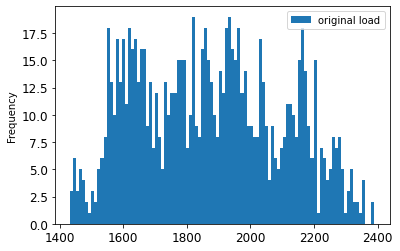

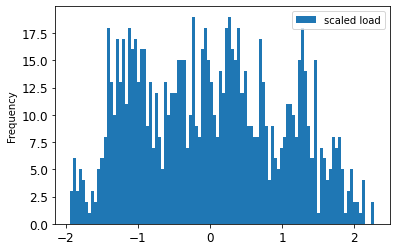

In [19]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5760)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-0.278530,-0.421059,0.277919,-1.661325,-0.16853,0.654654,0.322361,0.195107,0.231376,-0.526222,-1.189471,-0.782609,0.185998,-0.353523
4802,-0.353523,-0.464041,0.322711,-1.661325,-0.16853,0.654654,0.212012,0.464386,0.266703,-0.494861,-1.149322,-0.787187,0.130189,-0.379991
4803,-0.379991,-0.507024,0.367503,-1.661325,-0.16853,0.654654,0.026626,0.415827,0.107730,-0.579984,-1.193932,-0.759719,0.086089,-0.437338
4804,-0.437338,-0.550006,0.412296,-1.516862,-0.16853,0.654654,-0.141104,0.376098,0.120978,-0.660628,-1.305455,-0.855856,0.035744,-0.538799
4805,-0.538799,-0.592988,0.457088,-1.516862,-0.16853,0.654654,-0.282351,0.318711,0.191633,-0.700949,-1.376830,-1.016085,-0.029822,-0.627025
4806,-0.627025,-0.635970,0.501880,-1.516862,-0.16853,0.654654,-0.357388,0.208351,0.461004,-0.611346,-1.309916,-0.929104,-0.127000,-0.688784
4807,-0.688784,-0.678952,0.546672,-1.516862,-0.16853,0.654654,-0.383872,0.022946,0.412429,-0.691989,-1.416979,-1.011507,-0.225348,-0.759365
4808,-0.759365,-0.721934,0.591465,-1.372399,-0.16853,0.654654,-0.441253,-0.144802,0.372686,-0.745751,-1.434822,-1.038975,-0.326428,-0.790245
4809,-0.790245,-0.764917,0.636257,-1.372399,-0.16853,0.654654,-0.542774,-0.286062,0.315279,-1.045924,-1.439283,-1.121379,-0.425167,-0.829947
4810,-0.829947,-0.807899,0.681049,-1.372399,-0.16853,0.654654,-0.631053,-0.361107,0.204880,-0.839835,-1.537424,-1.199204,-0.517661,-0.891705


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5751,-0.807890,-0.987642,0.821025,1.372399,0.947255,0.654654,-0.260281,0.287810,0.695048,-0.544143,-0.498026,-0.507931,-0.109437,-0.737309
5752,-0.737309,-0.975920,0.860218,1.516862,0.947255,0.654654,-0.388286,-0.038856,0.491915,-0.871197,-0.578323,-0.567444,-0.219104,-0.499097
5753,-0.499097,-0.964198,0.899412,1.516862,0.947255,0.654654,-0.450081,-0.025613,0.403597,-0.566544,-0.386503,-0.137115,-0.299890,-0.331466
5754,-0.331466,-0.952475,0.938605,1.516862,0.947255,0.654654,-0.714919,-0.158045,0.408013,-0.208128,-0.096542,0.036848,-0.366236,-0.357934
5755,-0.357934,-0.940753,0.977798,1.516862,0.947255,0.654654,-0.812026,-0.263990,0.284367,-0.123005,-0.078698,0.059738,-0.423996,-0.459395
5756,-0.459395,-0.929030,1.016991,1.661325,0.947255,0.654654,-0.741402,-0.392008,-0.042411,-0.145406,-0.114386,-0.095913,-0.461852,-0.600557
5757,-0.600557,-0.917308,1.056185,1.661325,0.947255,0.654654,-0.503049,-0.453810,-0.029163,-0.333574,-0.274979,-0.196629,-0.513368,-0.785833
5758,-0.785833,-0.905585,1.095378,1.661325,0.947255,0.654654,-0.335318,-0.718674,-0.161641,-0.584464,-0.417729,-0.388903,-0.569567,-0.865237
5759,-0.865237,-0.893863,1.134571,1.661325,0.947255,0.654654,-0.361802,-0.815790,-0.267623,-0.562063,-0.649698,-0.544554,-0.623425,0.700787
5760,0.700787,0.429760,1.714588,-1.661325,0.947255,0.654654,1.059492,1.183933,1.459003,0.674470,-0.667542,1.062313,1.168701,0.700787


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4801,-0.353523
4802,-0.379991
4803,-0.437338
4804,-0.538799
4805,-0.627025
...,...
5756,-0.600557
5757,-0.785833
5758,-0.865237
5759,0.700787


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.278530,-0.421059,0.277919,-1.661325,-0.168530,0.654654,0.322361,0.195107,0.231376,-0.526222,-1.189471,-0.782609,0.185998
4802,-0.353523,-0.464041,0.322711,-1.661325,-0.168530,0.654654,0.212012,0.464386,0.266703,-0.494861,-1.149322,-0.787187,0.130189
4803,-0.379991,-0.507024,0.367503,-1.661325,-0.168530,0.654654,0.026626,0.415827,0.107730,-0.579984,-1.193932,-0.759719,0.086089
4804,-0.437338,-0.550006,0.412296,-1.516862,-0.168530,0.654654,-0.141104,0.376098,0.120978,-0.660628,-1.305455,-0.855856,0.035744
4805,-0.538799,-0.592988,0.457088,-1.516862,-0.168530,0.654654,-0.282351,0.318711,0.191633,-0.700949,-1.376830,-1.016085,-0.029822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5756,-0.459395,-0.929030,1.016991,1.661325,0.947255,0.654654,-0.741402,-0.392008,-0.042411,-0.145406,-0.114386,-0.095913,-0.461852
5757,-0.600557,-0.917308,1.056185,1.661325,0.947255,0.654654,-0.503049,-0.453810,-0.029163,-0.333574,-0.274979,-0.196629,-0.513368
5758,-0.785833,-0.905585,1.095378,1.661325,0.947255,0.654654,-0.335318,-0.718674,-0.161641,-0.584464,-0.417729,-0.388903,-0.569567
5759,-0.865237,-0.893863,1.134571,1.661325,0.947255,0.654654,-0.361802,-0.815790,-0.267623,-0.562063,-0.649698,-0.544554,-0.623425


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(960, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
401/401 [==============================] - 5s 13ms/step - loss: 0.1994 - val_loss: 0.1125
Epoch 2/300
401/401 [==============================] - 5s 11ms/step - loss: 0.0532 - val_loss: 0.0534
Epoch 3/300
401/401 [==============================] - 5s 11ms/step - loss: 0.0393 - val_loss: 0.0517
Epoch 4/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0363 - val_loss: 0.0457
Epoch 5/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0346 - val_loss: 0.0569
Epoch 6/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0333 - val_loss: 0.0623
Epoch 7/300
401/401 [==============================] - 5s 11ms/step - loss: 0.0335 - val_loss: 0.0326
Epoch 8/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0286 - val_loss: 0.0317
Epoch 9/300
401/401 [==============================] - 5s 12ms/step - loss: 0.0300 - val_loss: 0.0363
Epoch 10/300
401/401 [==============================] - 5s 12ms/step - loss: 0.029

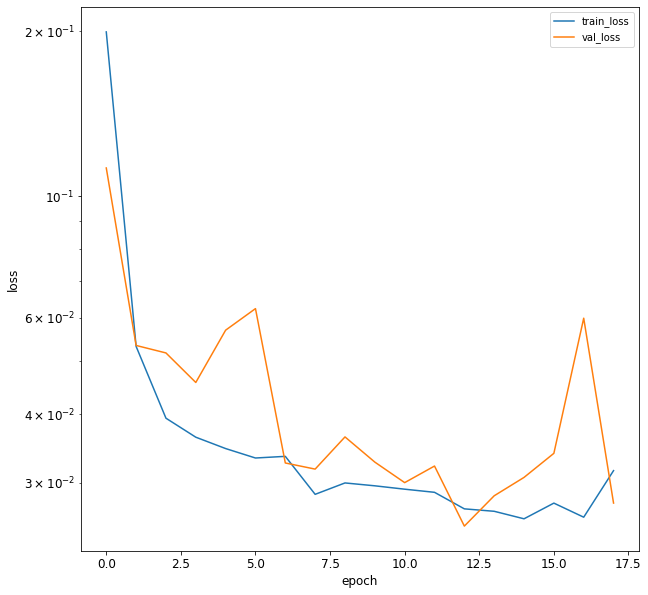

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5761][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,2001.0,21.132450,84.049360,1.0,6.0,1.0,2082.0,2153.0,2189.0,2021.0,1707.0,2057.0,2108.166667
5762,1980.0,20.597450,86.606595,1.0,6.0,1.0,2087.0,2141.0,2183.0,1998.0,1685.0,2050.0,2091.250000
5763,1984.0,20.062450,89.163830,1.0,6.0,1.0,2048.0,2138.0,2176.0,2001.0,1693.0,2052.0,2075.250000
5764,1935.0,20.062450,89.163830,2.0,6.0,1.0,2032.0,2114.0,2143.0,1976.0,1666.0,2010.0,2057.916667
5765,1936.0,20.062450,89.163830,2.0,6.0,1.0,2001.0,2082.0,2153.0,1981.0,1668.0,2008.0,2039.833333
5766,1908.0,20.027450,90.093027,2.0,6.0,1.0,1980.0,2087.0,2141.0,1956.0,1649.0,2002.0,2020.416667
5767,1894.0,19.992450,91.022224,2.0,6.0,1.0,1984.0,2048.0,2138.0,1952.0,1639.0,1978.0,2000.083333
5768,1883.0,19.992450,91.022224,3.0,6.0,1.0,1935.0,2032.0,2114.0,1948.0,1631.0,1970.0,1980.833333
5769,1880.0,19.992450,91.022224,3.0,6.0,1.0,1936.0,2001.0,2082.0,1936.0,1615.0,1931.0,1964.000000
5770,1882.0,19.962450,89.365547,3.0,6.0,1.0,1908.0,1980.0,2087.0,1933.0,1608.0,1951.0,1946.916667


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 5761 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2879 non-null   float64
 1   Temp    2879 non-null   float64
 2   Hum     2879 non-null   float64
 3   A       2879 non-null   float64
 4   B       2879 non-null   float64
 5   C       2879 non-null   float64
 6   D       2879 non-null   float64
 7   E       2879 non-null   float64
 8   F       2879 non-null   float64
 9   G       2879 non-null   float64
 10  H       2879 non-null   float64
 11  I       2879 non-null   float64
 12  J       2879 non-null   float64
dtypes: float64(13)
memory usage: 314.9 KB


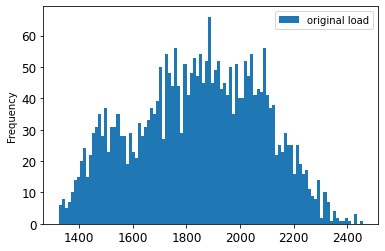

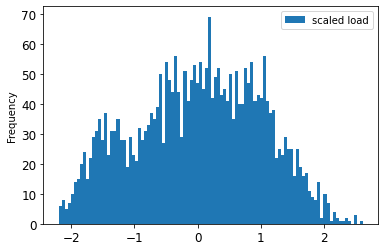

In [33]:
stlf_data[stlf_data.index >= 5761][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5761][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5761,0.674400,0.449041,0.703524,-1.662410,0.901439,0.707291,1.015623,1.313454,1.461872,0.691170,-0.633330,0.763256,1.180154,0.585274
5762,0.585274,0.317927,0.854869,-1.662410,0.901439,0.707291,1.036854,1.262524,1.436436,0.595330,-0.724543,0.734545,1.104844,0.602250
5763,0.602250,0.186814,1.006214,-1.662410,0.901439,0.707291,0.871255,1.249791,1.406760,0.607831,-0.691375,0.742748,1.033615,0.394289
5764,0.394289,0.186814,1.006214,-1.517903,0.901439,0.707291,0.803318,1.147932,1.266860,0.503657,-0.803318,0.570481,0.956450,0.398533
5765,0.398533,0.186814,1.006214,-1.517903,0.901439,0.707291,0.671688,1.012118,1.309254,0.524492,-0.795026,0.562278,0.875947,0.279699
5766,0.279699,0.178237,1.061207,-1.517903,0.901439,0.707291,0.582520,1.033339,1.258381,0.420318,-0.873801,0.537669,0.789507,0.220281
5767,0.220281,0.169659,1.116200,-1.517903,0.901439,0.707291,0.599504,0.867817,1.245663,0.403650,-0.915261,0.439230,0.698987,0.173596
5768,0.173596,0.169659,1.116200,-1.373396,0.901439,0.707291,0.391445,0.799911,1.143917,0.386982,-0.948430,0.406418,0.613290,0.160864
5769,0.160864,0.169659,1.116200,-1.373396,0.901439,0.707291,0.395691,0.668342,1.008256,0.336979,-1.014766,0.246455,0.538351,0.169352
5770,0.169352,0.162307,1.018153,-1.373396,0.901439,0.707291,0.276800,0.579214,1.029453,0.324478,-1.043789,0.328487,0.462299,0.156620


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8635,-1.027484,-1.438007,0.366473,1.516749,1.392962,-1.413845,-0.725282,-0.346012,0.101025,-0.825603,-0.761858,-0.930702,-0.596489,-1.150563
8636,-1.150563,-1.438007,0.366473,1.661256,1.392962,-1.413845,-0.886634,-0.413919,-0.077030,-0.938111,-0.890385,-1.033242,-0.691090,-1.260910
8637,-1.260910,-1.438007,0.366473,1.661256,1.392962,-1.413845,-0.848419,-0.515779,-0.183015,-1.008949,-0.994036,-1.098868,-0.786062,-1.243933
8638,-1.243933,-1.519481,0.366473,1.661256,1.392962,-1.413845,-0.997032,-0.613395,-0.204212,-1.071453,-1.101833,-1.180900,-0.877695,-1.328815
8639,-1.328815,-1.519481,0.357340,1.661256,1.392962,-1.413845,-1.031001,-0.727987,-0.348352,-1.179794,-1.246945,-1.299846,-0.964135,-1.328815


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5761,0.585274
5762,0.602250
5763,0.394289
5764,0.398533
5765,0.279699
...,...
8635,-1.150563
8636,-1.260910
8637,-1.243933
8638,-1.328815


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,0.674400,0.449041,0.703524,-1.662410,0.901439,0.707291,1.015623,1.313454,1.461872,0.691170,-0.633330,0.763256,1.180154
5762,0.585274,0.317927,0.854869,-1.662410,0.901439,0.707291,1.036854,1.262524,1.436436,0.595330,-0.724543,0.734545,1.104844
5763,0.602250,0.186814,1.006214,-1.662410,0.901439,0.707291,0.871255,1.249791,1.406760,0.607831,-0.691375,0.742748,1.033615
5764,0.394289,0.186814,1.006214,-1.517903,0.901439,0.707291,0.803318,1.147932,1.266860,0.503657,-0.803318,0.570481,0.956450
5765,0.398533,0.186814,1.006214,-1.517903,0.901439,0.707291,0.671688,1.012118,1.309254,0.524492,-0.795026,0.562278,0.875947
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,-1.027484,-1.438007,0.366473,1.516749,1.392962,-1.413845,-0.725282,-0.346012,0.101025,-0.825603,-0.761858,-0.930702,-0.596489
8636,-1.150563,-1.438007,0.366473,1.661256,1.392962,-1.413845,-0.886634,-0.413919,-0.077030,-0.938111,-0.890385,-1.033242,-0.691090
8637,-1.260910,-1.438007,0.366473,1.661256,1.392962,-1.413845,-0.848419,-0.515779,-0.183015,-1.008949,-0.994036,-1.098868,-0.786062
8638,-1.243933,-1.519481,0.366473,1.661256,1.392962,-1.413845,-0.997032,-0.613395,-0.204212,-1.071453,-1.101833,-1.180900,-0.877695


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2879, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2879,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[ 0.56477016],
       [ 0.47103596],
       [ 0.49229625],
       ...,
       [-1.4671723 ],
       [-1.4807868 ],
       [-1.5469404 ]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5761][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1842.097082
dtype: float64
Cons    235.662138
dtype: float64


In [42]:
load_mean=1842.097082
load_std=235.662138
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2879, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2879, 1)


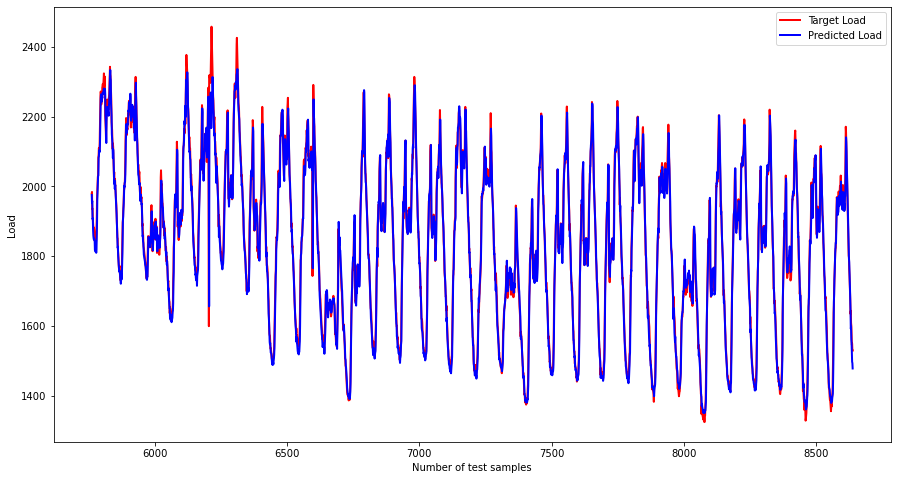

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.1803977134547412


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.370605
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5761  197902.639593
5762  198304.023606
5763  193400.420229
5764  193503.179526
5765  190701.135163
...             ...
8635  156996.679929
8636  154396.593296
8637  154798.304841
8638  152796.903378
8639  152797.923025

[2879 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5761    23.347634
5762   956.184522
5763   533.449814
5764   898.540353
5765     0.033851
...           ...
8635   476.372212
8636   734.634999
8637  2767.706482
8638  1282.643884
8639  2642.357001

[2879 rows x 1 columns]
y_t+1    1204.965904
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    34.712619
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[1975.192]
[1953.1024]
[1958.1127]
[1906.0406]
[1908.1954]
[1875.2877]
[1858.8655]
[1851.559]
[1847.5151]
[1850.476]
[1847.2411]
[1844.6177]
[1816.654]
[1819.9519]
[1812.5638]
[1814.0789]
[1817.1213]
[1809.4454]
[1818.1189]
[1856.5708]
[1894.5001]
[1962.0657]
[1985.2711]
[2005.0555]
[2029.3147]
[2031.1754]
[2081.9429]
[2085.5256]
[2103.586]
[2100.9941]
[2098.5593]
[2116.4749]
[2160.1855]
[2202.0771]
[2250.4775]
[2263.8093]
[2254.7458]
[2242.2798]
[2254.8867]
[2257.4912]
[2253.1685]
[2268.371]
[2268.5686]
[2267.6577]
[2264.7305]
[2276.693]
[2280.6013]
[2278.772]
[2276.0945]
[2274.9775]
[2279.738]
[2264.4314]
[2203.227]
[2185.465]
[2158.228]
[2124.398]
[2187.6282]
[2207.279]
[2214.656]
[2227.841]
[2221.764]
[2219.3494]
[2213.9487]
[2209.6648]
[2202.6572]
[2229.9592]
[2241.266]
[2256.3857]
[2294.1233]
[2320.048]
[2333.6147]
[2310.8398]
[2305.0537]
[2238.3328]
[2219.0835]
[2202.1658]
[2150.0098]
[2135.6536]
[2125.8435]
[2100.36]
[2080.9724]
[2105.878]
[2094.7607]
[2069.526]
[2036.4099]
[20

[2074.7703]
[2104.6284]
[2135.483]
[2132.8862]
[2104.5503]
[2098.5798]
[2086.0886]
[2062.5183]
[2083.4624]
[2077.9302]
[2082.1523]
[2120.7246]
[2192.4067]
[2208.3967]
[2223.4219]
[2178.5688]
[2158.7412]
[2115.2334]
[2074.8]
[2042.3331]
[2018.2919]
[2010.3558]
[1984.8152]
[1957.4177]
[1949.2117]
[1926.8647]
[1884.0277]
[1869.2764]
[1874.7003]
[1842.7335]
[1818.3127]
[1806.7051]
[1805.3241]
[1783.7811]
[1755.8883]
[1732.3351]
[1721.5411]
[1698.0741]
[1684.7386]
[1649.5631]
[1627.4196]
[1612.9419]
[1599.2239]
[1591.4392]
[1575.3813]
[1554.3344]
[1567.8755]
[1550.6482]
[1547.0044]
[1536.6228]
[1528.049]
[1523.1375]
[1526.1569]
[1519.8453]
[1517.8276]
[1525.9116]
[1524.8411]
[1540.2374]
[1555.8458]
[1598.6165]
[1671.5116]
[1735.8037]
[1803.2723]
[1805.9536]
[1824.6555]
[1854.2374]
[1854.9478]
[1858.3444]
[1877.8381]
[1892.92]
[1909.7515]
[1907.256]
[1970.7607]
[2026.8942]
[2047.0743]
[2059.0234]
[2031.6543]
[2032.2444]
[2034.575]
[2047.354]
[2089.1892]
[2105.6833]
[2100.1912]
[2120.427]
[21

[1561.8127]
[1545.4165]
[1545.6085]
[1528.6335]
[1492.3169]
[1479.5447]
[1474.7885]
[1464.8921]
[1457.3687]
[1463.4354]
[1469.3828]
[1459.5879]
[1462.167]
[1458.0189]
[1448.4974]
[1456.0703]
[1472.1792]
[1474.6041]
[1493.2551]
[1509.9653]
[1552.0476]
[1606.4998]
[1658.2709]
[1680.6487]
[1667.8575]
[1684.5372]
[1717.833]
[1724.7086]
[1742.8489]
[1762.1901]
[1773.7635]
[1788.1094]
[1832.5327]
[1898.1079]
[1950.0513]
[1978.3585]
[1975.7495]
[1979.4341]
[1983.2661]
[1993.8395]
[1987.1646]
[1999.52]
[2011.1455]
[2038.7566]
[2079.2727]
[2108.1958]
[2114.0886]
[2077.3767]
[2077.2434]
[2076.7507]
[2079.357]
[2004.9658]
[2004.725]
[2015.6733]
[2028.66]
[2013.971]
[2010.5692]
[2024.7128]
[2015.9088]
[2021.4539]
[2022.8455]
[2008.6328]
[2001.5554]
[1999.7761]
[1999.2175]
[2023.7103]
[2011.9006]
[2054.565]
[2136.4065]
[2165.5708]
[2144.4858]
[2077.2048]
[2060.0317]
[2012.4963]
[1978.6849]
[1962.8983]
[1947.2834]
[1930.2494]
[1900.5919]
[1863.0931]
[1848.5737]
[1805.1669]
[1807.2864]
[1782.5002]
[1

[1856.8037]
[1867.7806]
[1879.6544]
[1867.4427]
[1938.299]
[1967.8217]
[1979.3251]
[2025.5519]
[1992.1531]
[1985.9965]
[1986.3605]
[1982.1599]
[2012.0814]
[2022.8225]
[2038.8038]
[2027.0565]
[2045.9552]
[2056.1309]
[2046.8755]
[2028.4347]
[1980.6522]
[1998.3002]
[2016.0292]
[1988.337]
[1967.2642]
[1966.7605]
[1975.8966]
[1991.6174]
[2034.1039]
[2050.3481]
[2023.5769]
[2009.4398]
[2003.3691]
[1997.919]
[1994.7223]
[1979.4856]
[2004.7131]
[2040.8907]
[2052.7498]
[2089.992]
[2121.309]
[2153.2632]
[2126.9382]
[2072.1855]
[2051.383]
[2018.1713]
[1974.1748]
[1956.2777]
[1893.4222]
[1869.4364]
[1851.1781]
[1818.8805]
[1810.6469]
[1802.4908]
[1777.4934]
[1752.2806]
[1730.3779]
[1705.8889]
[1672.9491]
[1619.1749]
[1650.6648]
[1646.229]
[1609.7253]
[1580.2942]
[1567.761]
[1553.7788]
[1568.9003]
[1538.665]
[1526.0881]
[1512.061]
[1511.886]
[1497.0295]
[1480.7845]
[1473.56]
[1470.9062]
[1456.9861]
[1438.1002]
[1436.3694]
[1434.6057]
[1432.1699]
[1424.2388]
[1419.0729]
[1423.0547]
[1428.2694]
[1428

[1704.5878]
[1675.445]
[1640.3892]
[1591.5217]
[1597.4827]
[1560.7034]
[1549.127]
[1517.8442]
[1496.3401]
[1493.1316]
[1477.5417]
